In [89]:
# Import packages
import pandas as pd
import numpy as np
import itertools
from collections import Counter

# Plots
import matplotlib.pyplot as plt
import pycountry
from countryinfo import CountryInfo
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import Dropdown, Output, VBox, Checkbox, HBox, Layout
from IPython.display import display, HTML
import ipywidgets as widgets

# Clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

# Check for Missing Values and Duplicates

In [26]:
# Paths 2020 and 2024
csv_path2020_euroSciVoc = "./cordis-h2020projects-csv/euroSciVoc.csv"
csv_path2020_legalBasis = "./cordis-h2020projects-csv/legalBasis.csv"
csv_path2020_organization = "./cordis-h2020projects-csv/organization.csv"
csv_path2020_project = "./cordis-h2020projects-csv/project.csv"
csv_path2020_topics = "./cordis-h2020projects-csv/topics.csv"
csv_path2020_webItem = "./cordis-h2020projects-csv/webItem.csv"
csv_path2020_webLink = "./cordis-h2020projects-csv/webLink.csv"
csv_path2020_publication = "./cordis-h2020projects-csv/projectPublications2020.csv"

csv_path2024_euroSciVoc = "./cordis-HORIZONprojects-csv/euroSciVoc.csv"
csv_path2024_legalBasis = "./cordis-HORIZONprojects-csv/legalBasis.csv"
csv_path2024_organization = "./cordis-HORIZONprojects-csv/organization.csv"
csv_path2024_project = "./cordis-HORIZONprojects-csv/project.csv"
csv_path2024_topics = "./cordis-HORIZONprojects-csv/topics.csv"
csv_path2024_webItem = "./cordis-HORIZONprojects-csv/webItem.csv"
csv_path2024_webLink = "./cordis-HORIZONprojects-csv/webLink.csv"
csv_path2024_publication = "./cordis-HORIZONprojects-csv/projectPublications2024.csv"



In [27]:
## for horizon 2020 MISSING VALUES AND DUPLICATES

# Dataframes inlezen
df2020_euroSciVoc = pd.read_csv(csv_path2020_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_legalBasis = pd.read_csv(csv_path2020_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_organization = pd.read_csv(csv_path2020_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_project = pd.read_csv(csv_path2020_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_topics = pd.read_csv(csv_path2020_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webItem = pd.read_csv(csv_path2020_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webLink = pd.read_csv(csv_path2020_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_publication = pd.read_csv(csv_path2020_publication,delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2020_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2020_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2020_legalBasis.isnull().sum())
print("Duplicated rows:", df2020_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2020_organization.isnull().sum())
print("Duplicated rows:", df2020_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2020_project.isnull().sum())
print("Duplicated rows:", df2020_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2020_topics.isnull().sum())
print("Duplicated rows:", df2020_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2020_webItem.isnull().sum())
print("Duplicated rows:", df2020_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2020_webLink.isnull().sum())
print("Duplicated rows:", df2020_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2020_publication.isnull().sum())
print("Duplicated rows:", df2020_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2020_project.drop_duplicates(inplace=True)
df2020_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2020_organization.drop_duplicates(inplace=True)
df2020_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2020_euroSciVoc.drop_duplicates(inplace=True)
df2020_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2020_publication.drop_duplicates(inplace=True)
df2020_publication.dropna(subset=["projectID", "doi"], inplace= True)

=== euroSciVoc ===
Missing values:
 projectID                     0
euroSciVocCode                0
euroSciVocPath                0
euroSciVocTitle               0
euroSciVocDescription    114193
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                  0
legalBasis                 0
title                      0
uniqueProgrammePart    30399
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              23528
name                       0
shortName              40141
SME                      516
activityType             954
street                  1209
postCode                1986
city                     522
country                  264
nutsCode                 618
geolocation              232
organizationURL        62539
contactForm                0
contentUpdateDate          0
rcn                        0
order                   

In [28]:
## for horizon 2024
# Dataframes inlezen
df2024_euroSciVoc = pd.read_csv(csv_path2024_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_legalBasis = pd.read_csv(csv_path2024_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_organization = pd.read_csv(csv_path2024_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_project = pd.read_csv(csv_path2024_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_topics = pd.read_csv(csv_path2024_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webItem = pd.read_csv(csv_path2024_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webLink = pd.read_csv(csv_path2024_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_publication=pd.read_csv(csv_path2024_publication,  delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2024_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2024_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2024_legalBasis.isnull().sum())
print("Duplicated rows:", df2024_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2024_organization.isnull().sum())
print("Duplicated rows:", df2024_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2024_project.isnull().sum())
print("Duplicated rows:", df2024_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2024_topics.isnull().sum())
print("Duplicated rows:", df2024_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2024_webItem.isnull().sum())
print("Duplicated rows:", df2024_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2024_webLink.isnull().sum())
print("Duplicated rows:", df2024_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2024_publication.isnull().sum())
print("Duplicated rows:", df2024_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2024_project.drop_duplicates(inplace=True)
df2024_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2024_organization.drop_duplicates(inplace=True)
df2024_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2024_euroSciVoc.drop_duplicates(inplace=True)
df2024_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2024_publication.drop_duplicates(inplace=True)
df2024_publication.dropna(subset=["projectID", "doi"], inplace= True)


=== euroSciVoc ===
Missing values:
 projectID                    0
euroSciVocCode               0
euroSciVocPath               0
euroSciVocTitle              0
euroSciVocDescription    38789
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                 0
legalBasis                0
title                     0
uniqueProgrammePart    5171
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              15403
name                       0
shortName              25507
SME                      263
activityType              24
street                   300
postCode                 786
city                     263
country                   13
nutsCode                 278
geolocation              588
organizationURL        38954
contactForm                0
contentUpdateDate          0
rcn                        0
order                      0
role

In [29]:
# Concatenate 2020 and 2024 cleaned dataframes

# PROJECT — analysis of time, category, and funding
df_project = pd.concat([df2020_project, df2024_project], ignore_index=True)

# ORGANIZATION — funding and coordinator roles per country
df_organization = pd.concat([df2020_organization, df2024_organization], ignore_index=True)

# EUROSCIVOC — linking projects to categories
df_euroSciVoc = pd.concat([df2020_euroSciVoc, df2024_euroSciVoc], ignore_index=True)

# PUBLICATION — project-related research output
df_publication = pd.concat([df2020_publication, df2024_publication], ignore_index=True)

# TOPICS — project themes
df_topics = pd.concat([df2020_topics.drop_duplicates(), df2024_topics.drop_duplicates()], ignore_index=True)

# WEBITEM — items related to projects (e.g., websites)
df_webItem = pd.concat([df2020_webItem.drop_duplicates(), df2024_webItem.drop_duplicates()], ignore_index=True)

# WEBLINK — links associated with webItems
df_webLink = pd.concat([df2020_webLink.drop_duplicates(), df2024_webLink.drop_duplicates()], ignore_index=True)

# LEGALBASIS — legal frameworks
df_legalBasis = pd.concat([df2020_legalBasis.drop_duplicates(), df2024_legalBasis.drop_duplicates()], ignore_index=True)

# (Optional) Print shapes to confirm
print("df_project shape:", df_project.shape)
print("df_organization shape:", df_organization.shape)
print("df_euroSciVoc shape:", df_euroSciVoc.shape)
print("df_publication shape:", df_publication.shape)
print("df_topics shape:", df_topics.shape)
print("df_webItem shape:", df_webItem.shape)
print("df_webLink shape:", df_webLink.shape)
print("df_legalBasis shape:", df_legalBasis.shape)


df_project shape: (50315, 20)
df_organization shape: (254699, 25)
df_euroSciVoc shape: (152982, 5)
df_publication shape: (377900, 16)
df_topics shape: (50730, 3)
df_webItem shape: (14, 7)
df_webLink shape: (236823, 9)
df_legalBasis shape: (86311, 4)


# Research Categories

In [30]:
# Look if column euroSciVocPath exists
if 'euroSciVocPath' not in df2020_euroSciVoc.columns or 'euroSciVocPath' not in df2024_euroSciVoc.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df2020_euroSciVoc['category2020'] = df2020_euroSciVoc['euroSciVocPath'].str.split('/').str[1]
df2024_euroSciVoc['category2024'] = df2024_euroSciVoc['euroSciVocPath'].str.split('/').str[1]

# Count rows per category
category_counts_2020 = df2020_euroSciVoc['category2020'].value_counts().reset_index()
category_counts_2024 = df2024_euroSciVoc['category2024'].value_counts().reset_index()

# Choose column names
category_counts_2020.columns = ['category', 'count_2020']
category_counts_2024.columns = ['category', 'count_2024']

# Print 
print("\nNumber of projects per category in Horizon 2020:")
print(category_counts_2020.to_string(index=False))

print("\nNumber of projects per category in Horizon Europe:")
print(category_counts_2024.to_string(index=False))


Number of projects per category in Horizon 2020:
                   category  count_2020
           natural sciences       48421
 engineering and technology       25267
medical and health sciences       17468
            social sciences       16024
                 humanities        4028
      agricultural sciences        2985

Number of projects per category in Horizon Europe:
                   category  count_2024
           natural sciences       18075
 engineering and technology        6680
medical and health sciences        5985
            social sciences        5027
                 humanities        1739
      agricultural sciences        1283


In [31]:
# Extract year from startDate
df_project['startYear'] = pd.to_datetime(df_project['startDate'], errors='coerce').dt.year

# Check if 'euroSciVocPath' exists
if 'euroSciVocPath' not in df_euroSciVoc.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df_euroSciVoc['category'] = df_euroSciVoc['euroSciVocPath'].str.split('/').str[1]

# Merge euroSciVoc with project info
df_merged = df_euroSciVoc.merge(df_project, left_on='projectID', right_on='id')

# Count projects per category per year
category_per_year = df_merged.groupby(['startYear', 'category']).size().reset_index(name='project_count')

# Fix year column format
category_per_year['Year'] = category_per_year['startYear'].astype('Int64')
category_per_year = category_per_year.drop(columns='startYear')

# Print
print(category_per_year.sort_values(['Year', 'project_count'], ascending=[True, False]).to_string(index=False))

category_per_year.to_csv("category_per_year", index = False)


                   category  project_count  Year
 engineering and technology            351  2014
           natural sciences            213  2014
            social sciences            165  2014
medical and health sciences            127  2014
      agricultural sciences             24  2014
                 humanities              6  2014
           natural sciences           7656  2015
 engineering and technology           4255  2015
medical and health sciences           2624  2015
            social sciences           2464  2015
                 humanities            453  2015
      agricultural sciences            442  2015
           natural sciences           7827  2016
 engineering and technology           4258  2016
medical and health sciences           2724  2016
            social sciences           2641  2016
                 humanities            623  2016
      agricultural sciences            420  2016
           natural sciences           7273  2017
 engineering and tec

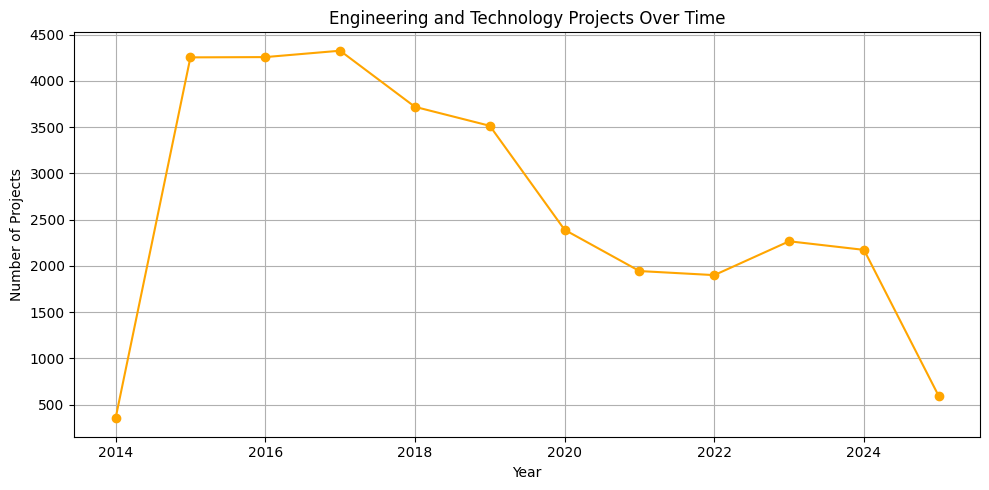

In [32]:
# Filter de juiste categorie
eng_tech = category_per_year[category_per_year['category'] == 'engineering and technology']

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(eng_tech['Year'], eng_tech['project_count'], marker='o', color='orange')
plt.title('Engineering and Technology Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Output-widget
out = Output()

# Alle categorieën
categories = sorted(category_per_year['category'].dropna().unique())

# Dropdown-widget
dropdown = Dropdown(
    options=categories,
    value='engineering and technology',
    description='Categorie:'
)

# Plotfunctie
def create_plot(selected_cat):
    data = category_per_year[category_per_year['category'] == selected_cat]
    fig = px.line(
        data,
        x='Year',
        y='project_count',
        markers=True,
        title=f'{selected_cat.capitalize()} Projects Over Time',
        labels={'project_count': 'Number of Projects'}
    )
    fig.update_layout(
        height=500,
        margin={"r": 0, "t": 50, "l": 0, "b": 0}
    )
    return fig

# Update-functie
def update_plot(change):
    with out:
        out.clear_output(wait=True)
        selected = change['new']
        fig = create_plot(selected)
        display(fig)

# Koppel de update-functie aan dropdown
dropdown.observe(update_plot, names='value')

# UI tonen
display(VBox([dropdown, out]))

# Initieel plot weergeven
with out:
    fig = create_plot(dropdown.value)
    display(fig)


# Funding Distribution 

## Comparison Across countries

### In organization.csv: columns ‘ecContribution’, ‘netEcContribution’

In [39]:
# Look if required columns exist
required_cols = ['country', 'ecContribution', 'netEcContribution']
for col in required_cols:
    if col not in df2020_organization.columns or col not in df2024_organization.columns:
        raise ValueError(f"Column '{col}' not found in one of the datasets")

# Group by country and sum contributions
funding_2020 = df2020_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()
funding_2024 = df2024_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()

# Choose column names
funding_2020.columns = ['country', 'ecContribution_2020', 'netEcContribution_2020']
funding_2024.columns = ['country', 'ecContribution_2024', 'netEcContribution_2024']

# Merge datasets on country
merged_funding = pd.merge(funding_2020, funding_2024, on='country', how='outer').fillna(0)

# Print 
# print("\nFunding distribution comparison (H2020 vs Horizon Europe):")
# print(merged_funding.sort_values(by='ecContribution_2024', ascending=False).to_string(index=False))

merged_funding.to_csv("merged_funding.csv", index=False)

In [40]:
# ISO2 naar ISO3
def convert_iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

# Kaartfunctie
def create_map(data, funding_column):
    data = data.copy()
    data["iso_alpha"] = data["country"].apply(convert_iso2_to_iso3)
    fig = px.scatter_geo(
        data,
        locations="iso_alpha",
        locationmode="ISO-3",
        size=funding_column,
        hover_name="country",
        projection="natural earth",
        title=f"Funding Levels",
        size_max=50
    )
    fig.update_geos(
        showcountries=True,
        countrycolor="LightGray",
        showcoastlines=True,
        coastlinecolor="LightGray",
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        height=600,
    )
    return fig

# Output-widget
out = Output()

# Extract available years from df_organization
df_organization['year'] = pd.to_datetime(df_organization['projectID'].map(
    df_project.set_index('id')['startDate']
), errors='coerce').dt.year
available_years = sorted(df_organization['year'].dropna().unique().astype(int))

# Range sliders for year selection
year_range = widgets.IntRangeSlider(
    value=[min(available_years), max(available_years)],
    min=min(available_years),
    max=max(available_years),
    step=1,
    description='Years:',
    continuous_update=False
)

toggle_contribution = widgets.ToggleButtons(
    options=[
        ('EC Contribution', 'ecContribution'),
        ('Net EC Contribution', 'netEcContribution')
    ],
    description='Type:',
    button_style=''
)

def update_map(change=None):
    with out:
        out.clear_output(wait=True)
        start_year, end_year = year_range.value
        contrib_type = toggle_contribution.value

        # Filter organizations by project start year
        orgs = df_organization[
            (df_organization['year'] >= start_year) &
            (df_organization['year'] <= end_year)
        ]

        # Group by country and sum contributions
        funding = orgs.groupby('country')[contrib_type].sum().reset_index()
        funding.columns = ['country', f'{contrib_type}_sum']
        if funding.empty:
            print("No data for selected period.")
            return
        fig = create_map(funding, f'{contrib_type}_sum')
        fig.update_layout(title=f"{toggle_contribution.label} {start_year}-{end_year}")
        display(fig)

year_range.observe(update_map, names='value')
toggle_contribution.observe(update_map, names='value')

display(VBox([widgets.HBox([year_range, toggle_contribution]), out]))

update_map()

## Network analysis

In [64]:

def country_network_matrices(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts
      • distance_df : 1 – 1/n transformation of network_df
      • norm_df     : distance_df normalised by row+column totals
    Returns the three dataframes in that order.
    """

    # ── 1. Project‑country incidence matrix (binary) ────────────────────────────
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()              # one flag per project–country
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # ── 2. Co‑operation counts between countries (adjacency) ───────────────────
    network_df = incidence.T @ incidence          # matrix multiplication
    np.fill_diagonal(network_df.values, 0)        # remove self‑loops
    network_df = network_df.astype(int)

    # ── 3. Distance matrix: linear with max collaborations ─────────────────────
    max_collab = network_df.values.max()
    if max_collab == 0:
        Exception("No collaborations found in the data.")
    else:
        dissimilarity_df = (max_collab - network_df + 1) / max_collab # +1 to avoid 0 dissimilarity between distinct countries


    # ── 4. Normalised matrix: d_ij / (total_i + total_j) ───────────────────────
    #totals = distance_df.sum(axis=1).to_numpy()          # row sums as 1‑D array
    #denom  = totals[:, None] + totals[None, :]           # outer sum
    #norm    = np.divide(distance_df.values,
    #                    denom,
    #                    out=np.zeros_like(distance_df.values),
    #                    where=denom != 0)                # avoid /0
    #norm_df = pd.DataFrame(norm,
    #                       index=distance_df.index,
    #                       columns=distance_df.columns)

    return network_df, dissimilarity_df


In [42]:
network_df2020, dissimilarity_df2020 = country_network_matrices(df2020_organization)
network_df2024, dissimilarity_df2024 = country_network_matrices(df2024_organization)

In [13]:
network_df2020.to_csv('landen_samenwerking_matrix2020.csv')
network_df2024.to_csv('landen_samenwerking_matrix2024.csv')

Clusteren per 1 jaar 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from ipywidgets import Dropdown, VBox, Output
from IPython.display import display, HTML
import plotly.express as px
import pycountry

# Functie om ISO2 → ISO3 om te zetten
def iso2_to_iso3(code: str) -> str | None:
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Clusteringfunctie
def cluster_dataframe(dissimilarity_df: pd.DataFrame, algo, name: str) -> pd.DataFrame:
    if getattr(algo, "metric", None) == "precomputed" or getattr(algo, "affinity", "") == "precomputed":
        algo.fit(dissimilarity_df)
    else:
        algo.fit(dissimilarity_df.values)

    return (
        pd.DataFrame({
            "country": dissimilarity_df.index,
            "cluster": algo.labels_.astype(str)
        })
        .assign(iso_alpha=lambda df: df["country"].map(iso2_to_iso3))
        .dropna(subset=["iso_alpha"])
    )

# Plotfunctie
def cluster_map(df: pd.DataFrame, title: str) -> px.choropleth:
    fig = px.choropleth(
        df,
        locations="iso_alpha",
        color="cluster",
        hover_name="country",
        color_discrete_sequence=px.colors.qualitative.Set3,
        projection="natural earth",
        title=title
    )
    fig.update_geos(showcountries=True, countrycolor="LightGray",
                    showcoastlines=True, coastlinecolor="Gray")
    fig.update_layout(margin=dict(r=0, l=0, t=50, b=0))
    return fig

# Kernfunctie: clustering voor één jaar en methode
def cluster_projects_for_year(selected_year: int, method: str) -> list:
    df_project['startDate'] = pd.to_datetime(df_project['startDate'], errors='coerce')
    project_ids = df_project[df_project['startDate'].dt.year == selected_year]['id']
    df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]

    if df_filtered_org.empty:
        return []

    _, dissimilarity_df = country_network_matrices(df_filtered_org)

    clusterers = {
        "K-means":   KMeans(n_clusters=5, n_init="auto", random_state=42),
        "Spectral":  SpectralClustering(n_clusters=5, affinity="precomputed", random_state=42),
    }

    figs = []
    if method in clusterers:
        algo = clusterers[method]
        input_matrix = 1/dissimilarity_df if method == "Spectral" else dissimilarity_df
        df_clustered = cluster_dataframe(input_matrix, algo, method)
        fig = cluster_map(df_clustered, f"{method} clustering — international cooperation ({selected_year})")
        figs.append(fig)
    return figs

# Unieke jaartallen ophalen
df_combined = df_project.copy()
df_combined['startDate'] = pd.to_datetime(df_combined['startDate'], errors='coerce')
available_years = sorted(df_combined['startDate'].dt.year.dropna().unique().astype(int))

# UI: dropdowns + output
dropdown_year = Dropdown(
    options=available_years,
    value=available_years[0],
    description='Startjaar:'
)

dropdown_method = Dropdown(
    options=['K-means', 'Spectral'],
    value='K-means',
    description='Methode:'
)

out = Output()

def update_plot(change=None):
    with out:
        out.clear_output(wait=True)
        year = dropdown_year.value
        method = dropdown_method.value
        figs = cluster_projects_for_year(year, method)
        if figs:
            for fig in figs:
                display(HTML(fig.to_html(include_plotlyjs='cdn')))
        else:
            print("Geen projecten gevonden voor dit jaar.")

dropdown_year.observe(update_plot, names='value')
dropdown_method.observe(update_plot, names='value')

display(VBox([dropdown_year, dropdown_method, out]))

with out:
    initial_figs = cluster_projects_for_year(dropdown_year.value, dropdown_method.value)
    for fig in initial_figs:
        display(HTML(fig.to_html(include_plotlyjs='cdn')))

## Collaboration Network Graph

In [ ]:
from ipywidgets import Dropdown, VBox, Output, Checkbox, HBox, Layout, IntRangeSlider
from IPython.display import display
import plotly.graph_objects as go
from countryinfo import CountryInfo
from sklearn.cluster import KMeans

# Ensure year columns exist
df_project['startYear'] = pd.to_datetime(df_project['startDate'], errors='coerce').dt.year
df_organization['year'] = df_organization['projectID'].map(df_project.set_index('id')['startYear'])

# Year range slider
years = sorted(df_project['startYear'].dropna().unique())
year_range = IntRangeSlider(
    value=[years[0], years[-1]],
    min=years[0],
    max=years[-1],
    step=1,
    description='Years:',
    continuous_update=False
)

dropdown_cluster = Dropdown(description='Cluster:')
out_links = Output()
checkboxes_box = VBox()

def get_lat_lon_from_iso2(iso2):
    try:
        info = CountryInfo(iso2)
        latlng = info.latlng()
        if latlng and len(latlng) == 2:
            return latlng[0], latlng[1]
    except Exception:
        pass
    return None, None

def update_cluster_network(*args):
    start_year, end_year = year_range.value
    # Filter projects and organizations by year range
    project_ids = df_project[(df_project['startYear'] >= start_year) & (df_project['startYear'] <= end_year)]['id']
    df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]

    if df_filtered_org.empty:
        with out_links:
            out_links.clear_output()
            print("No data for selected period.")
        checkboxes_box.children = []
        dropdown_cluster.options = []
        return

    # Recompute network and clusters for selected years
    network_df, dissimilarity_df = country_network_matrices(df_filtered_org)
    clusters_df = cluster_dataframe(dissimilarity_df, KMeans(n_clusters=5, n_init="auto", random_state=42), "K-means")

    # Update cluster dropdown options
    cluster_options = sorted(clusters_df['cluster'].unique())
    dropdown_cluster.options = cluster_options
    dropdown_cluster.value = cluster_options[0] if cluster_options else None

    def plot_cluster_links(selected_cluster, visible_countries=None):
        with out_links:
            out_links.clear_output(wait=True)
            countries = clusters_df[clusters_df['cluster'] == selected_cluster]['country'].tolist()
            if len(countries) < 2:
                print("Not enough countries in this cluster to show links.")
                return

            coords = {}
            for c in countries:
                lat, lon = get_lat_lon_from_iso2(c)
                if lat is not None and lon is not None:
                    coords[c] = (lat, lon)
            valid_countries = [c for c in countries if c in coords]

            if visible_countries is None:
                visible_countries = set(valid_countries)
            else:
                visible_countries = set(visible_countries)

            lines = []
            max_weight = 0
            for i, c1 in enumerate(valid_countries):
                for j, c2 in enumerate(valid_countries):
                    if j <= i:
                        continue
                    if c1 not in visible_countries or c2 not in visible_countries:
                        continue
                    weight = network_df.loc[c1, c2]
                    if weight > 0:
                        max_weight = max(max_weight, weight)
                        lines.append({
                            'from': c1,
                            'to': c2,
                            'weight': weight,
                            'from_lat': coords[c1][0],
                            'from_lon': coords[c1][1],
                            'to_lat': coords[c2][0],
                            'to_lon': coords[c2][1],
                        })

            lats = [coords[c][0] for c in valid_countries if c in visible_countries]
            lons = [coords[c][1] for c in valid_countries if c in visible_countries]
            names = [c for c in valid_countries if c in visible_countries]

            fig = go.Figure()
            for link in lines:
                width = max(1, link['weight'] / max_weight * 10)
                fig.add_trace(go.Scattergeo(
                    lon=[link['from_lon'], link['to_lon']],
                    lat=[link['from_lat'], link['to_lat']],
                    mode='lines',
                    line=dict(width=width, color='orange'),
                    opacity=0.7,
                    showlegend=False,
                    hoverinfo='skip'
                ))
            fig.add_trace(go.Scattergeo(
                lon=lons,
                lat=lats,
                mode='markers+text',
                marker=dict(size=10, color='blue'),
                text=names,
                textposition="top center",
                hoverinfo='text'
            ))
            fig.update_geos(
                showcountries=True,
                countrycolor="LightGray",
                showcoastlines=True,
                coastlinecolor="Gray",
                projection_type="natural earth"
            )
            fig.update_layout(
                title=f"Collaboration Links in Cluster {selected_cluster} ({start_year}-{end_year})",
                height=600,
                margin=dict(r=0, l=0, t=50, b=0)
            )
            display(fig)

    def update_checkboxes(selected_cluster):
        countries = clusters_df[clusters_df['cluster'] == selected_cluster]['country'].tolist()
        coords = {}
        for c in countries:
            lat, lon = get_lat_lon_from_iso2(c)
            if lat is not None and lon is not None:
                coords[c] = (lat, lon)
        valid_countries = [c for c in countries if c in coords]
        checkboxes = [Checkbox(value=True, description=c, indent=False, layout=Layout(width='200px')) for c in valid_countries]
        checkboxes_box.children = checkboxes

        def on_checkbox_change(change):
            visible_countries = [cb.description for cb in checkboxes if cb.value]
            plot_cluster_links(selected_cluster, visible_countries)

        for cb in checkboxes:
            cb.observe(on_checkbox_change, names='value')
        plot_cluster_links(selected_cluster, valid_countries)

    dropdown_cluster.observe(lambda change: update_checkboxes(change['new']), names='value')
    if dropdown_cluster.value is not None:
        update_checkboxes(dropdown_cluster.value)
    else:
        checkboxes_box.children = []
        with out_links:
            out_links.clear_output()
            print("No clusters for selected period.")

# Observe year slider
year_range.observe(update_cluster_network, names='value')

# Initial UI
display(VBox([year_range, dropdown_cluster, checkboxes_box, out_links]))
update_cluster_network()

## Research Impact

## Explanatory Data analysis